In [ ]:
import os

import pandas as pd
import numpy as np
import kagglehub
import seaborn as sns
from seaborn import objects as so

## Aquisição dos Dados

In [ ]:
path = kagglehub.dataset_download("tamber/steam-video-games")
steam_file_path = path + '/' + os.listdir(path)[0]

df = pd.read_csv(steam_file_path, header=None)
print('Dados carregados!')

Using Colab cache for faster access to the 'steam-video-games' dataset.
Dados carregados!


## Pré-processamento

In [ ]:
df.drop(columns=[4], inplace=True)

In [ ]:
df.rename(columns={0: 'ID: Usuário', 1: 'Jogo', 2: 'Ação', 3: 'Horas Jogadas'}, inplace=True)

In [ ]:
df.loc[df['Ação'] == 'purchase', 'Ação'] = 'comprar'
df.loc[df['Ação'] == 'play', 'Ação'] = 'jogar'

In [ ]:
df.loc[df['Ação'] == 'comprar', 'Horas Jogadas'] = np.nan

## Análise Exploratória dos Dados

In [ ]:
# Linhas iniciais do dados

df.head()

,ID: Usuário,Jogo,Ação,Horas Jogadas
0,151603712,The Elder Scrolls V Skyrim,comprar,NaN
1,151603712,The Elder Scrolls V Skyrim,jogar,273.0
2,151603712,Fallout 4,comprar,NaN
3,151603712,Fallout 4,jogar,87.0
4,151603712,Spore,comprar,NaN


In [ ]:
# Linhas finais dos dados

df.tail()

,ID: Usuário,Jogo,Ação,Horas Jogadas
199995,128470551,Titan Souls,jogar,1.5
199996,128470551,Grand Theft Auto Vice City,comprar,NaN
199997,128470551,Grand Theft Auto Vice City,jogar,1.5
199998,128470551,RUSH,comprar,NaN
199999,128470551,RUSH,jogar,1.4


In [ ]:
# Dimensão dos dados

print('Dimensão: (Linhas, Colunas): ', df.shape)

Dimensão: (Linhas, Colunas):  (200000, 4)


In [ ]:
# Quantos usuários únicos existem nos dados?

print('Usuários únicos: ', len(df['ID: Usuário'].unique()))

Usuários únicos:  12393


In [ ]:
# Quantos jogos únicos existem nos dados?

print('Jogos únicos: ', len(df['Jogo'].unique()))

Jogos únicos:  5155


In [ ]:
# Principais jogos adquiridos

print('Jogos mais comprados (adquiridos):')
df.loc[df['Ação'] == 'comprar', 'Jogo'].value_counts().head()

Jogos mais comprados (adquiridos):


,count
Jogo,
Dota 2,4841
Team Fortress 2,2323
Unturned,1563
Counter-Strike Global Offensive,1412
Half-Life 2 Lost Coast,981


In [ ]:
# Principais jogos jogados

print('Jogos mais jogados:')
df.loc[df['Ação'] == 'jogar', 'Jogo'].value_counts().head()

Jogos mais jogados:


,count
Jogo,
Dota 2,4841
Team Fortress 2,2323
Counter-Strike Global Offensive,1377
Unturned,1069
Left 4 Dead 2,801


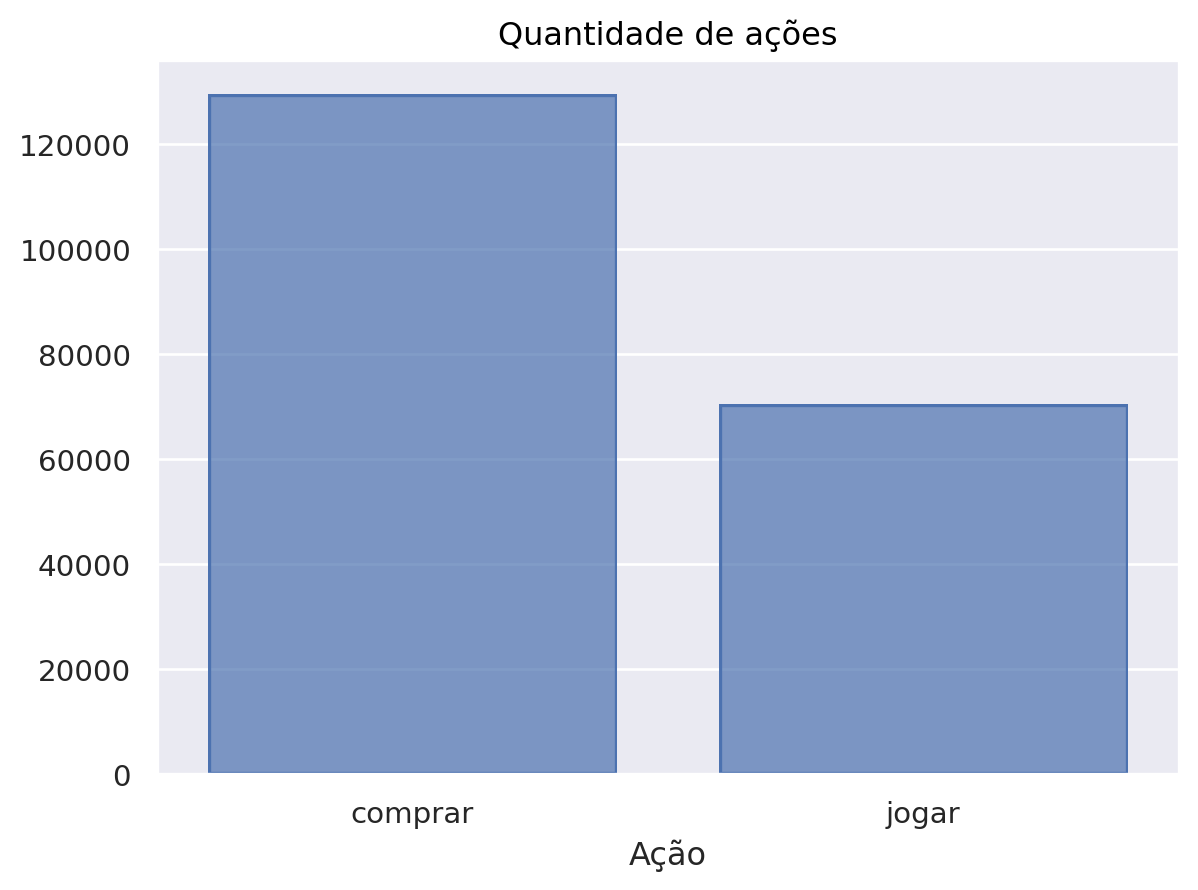

In [ ]:
# Distribuições de ações

so.Plot(df, x='Ação').add(so.Bar(), so.Count()).label(title='Quantidade de ações')

In [ ]:
# Minimo e máximo de horas jogadas

print('Menor valor de tempo jogado (h): ', df['Horas Jogadas'].min())
print('Maior valor de tempo jogado (h): ', df['Horas Jogadas'].max())

Menor valor de tempo jogado (h):  0.1
Maior valor de tempo jogado (h):  11754.0


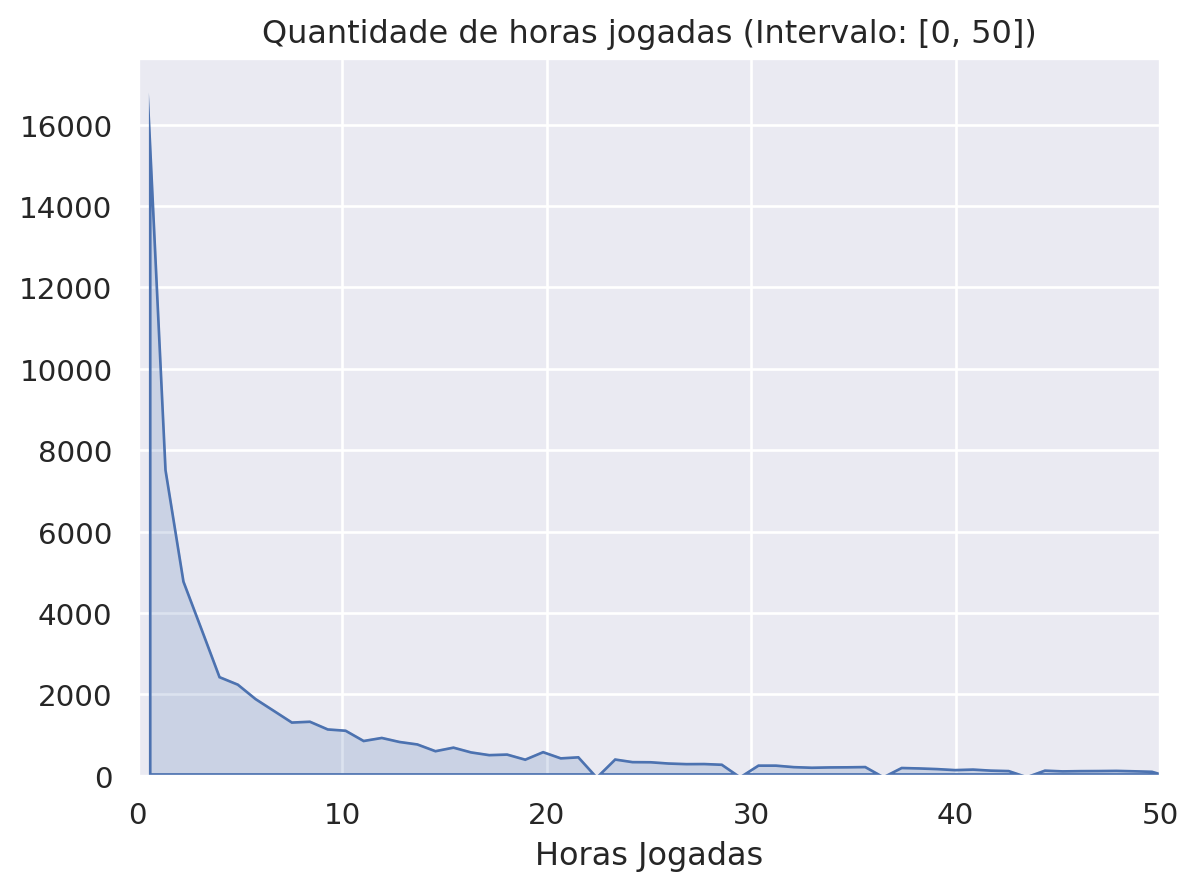

In [ ]:
# Distribuição de Quantidade de Jogadores por Horas Jogadas
# (*) Intervalo [0, 50] usado devido ao valor máximo, Plot
#     ficaria esparço sem ele. Porém, não há necessidade de
#     removê-lo.

so.Plot(df, x='Horas Jogadas').add(so.Area(), so.Hist()).label(title='Quantidade de horas jogadas (Intervalo: [0, 50])').limit(x=(0, 50))

## Processamento de Interações

In [ ]:
conditions = [
    df['Ação'] == 'comprar',
    df['Ação'] == 'jogar',
]

choices = [1, 2]

df['Peso'] = np.select(conditions, choices)

In [ ]:
df.loc[(df['Ação'] == 'jogar') & (df['Horas Jogadas'] > 2), 'Peso'] *= 2

In [ ]:
print('Resultados:')
df.head(10)

Resultados:


,ID: Usuário,Jogo,Ação,Horas Jogadas,Peso
0,151603712,The Elder Scrolls V Skyrim,comprar,NaN,1
1,151603712,The Elder Scrolls V Skyrim,jogar,273.0,4
2,151603712,Fallout 4,comprar,NaN,1
3,151603712,Fallout 4,jogar,87.0,4
4,151603712,Spore,comprar,NaN,1
5,151603712,Spore,jogar,14.9,4
6,151603712,Fallout New Vegas,comprar,NaN,1
7,151603712,Fallout New Vegas,jogar,12.1,4
8,151603712,Left 4 Dead 2,comprar,NaN,1
9,151603712,Left 4 Dead 2,jogar,8.9,4


In [ ]:
dados_treinamento = df.groupby(['ID: Usuário', 'Jogo'], sort=False)['Peso'].sum().reset_index()

In [ ]:
dados_treinamento.head()

,ID: Usuário,Jogo,Peso
0,151603712,The Elder Scrolls V Skyrim,5
1,151603712,Fallout 4,5
2,151603712,Spore,5
3,151603712,Fallout New Vegas,5
4,151603712,Left 4 Dead 2,5


In [ ]:
dados_treinamento.to_parquet('data/dados_treinamento.parquet')